In [85]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250


In [6]:
df.shape

(24, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   km      24 non-null     int64
 1   price   24 non-null     int64
dtypes: int64(2)
memory usage: 512.0 bytes


In [849]:
class GradientDescent:
    def __init__(self, learning_rate = 0.1, theta=None, n_iterations=50, plot=False):
        self.theta = theta
        self.n_iterations = n_iterations
        self.mse = dict()
        self.learning_rate = learning_rate
        self.plot= plot
        pass
    
    def fit(self, X, y):
        m = len(X)
        X_bias = np.c_[np.ones((len(X), 1)), X]
        if self.theta == None:
#             self.theta = np.random.randn(X_bias.shape[1])
            self.theta = np.ones((1, X_bias.shape[1]))
        for i in range(self.n_iterations + 1):
            y_pred = self.theta.dot(X_bias.T)[0]
            
            if (self.plot == True):
#                 plt.figure(figsize=(10,6))
                plt.plot(self.theta[0][1] * range(250000) + self.theta[0][0])
                plt.scatter(X, y)
                plt.xlabel('km')
                plt.ylabel('price')
                plt.ylim([3500, 10000])
            
            self.mse[i] = (1. / m) * sum((y-y_pred) ** 2)
            gradients = -(2. / m) * np.dot((y-y_pred).T, X_bias)
            step_size = self.learning_rate * gradients
            self.theta = self.theta + step_size
            pass
        pass
    
    def predict(self, X):
        X_bias = np.c_[np.ones((len(X), 1)), X]
        return np.dot(self.theta, X_bias.T)[0]
    
    def mean_squared_error(self, y, y_pred):
        return sum((y - y_pred) ** 2) / len(y)
    
    def mae(self, y, y_pred):
        return np.abs(y - y_pred).mean()
    

In [850]:
X = df['km']

In [851]:
y = df['price']

In [852]:
gd = GradientDescent(plot=True)

<ipython-input-849-c664750bdef1>:21: RuntimeWarning: invalid value encountered in multiply
  plt.plot(self.theta[0][1] * range(250000) + self.theta[0][0])
<ipython-input-849-c664750bdef1>:21: RuntimeWarning: invalid value encountered in multiply
  plt.plot(self.theta[0][1] * range(250000) + self.theta[0][0])
<ipython-input-849-c664750bdef1>:21: RuntimeWarning: invalid value encountered in multiply
  plt.plot(self.theta[0][1] * range(250000) + self.theta[0][0])
<ipython-input-849-c664750bdef1>:21: RuntimeWarning: invalid value encountered in multiply
  plt.plot(self.theta[0][1] * range(250000) + self.theta[0][0])
<ipython-input-849-c664750bdef1>:21: RuntimeWarning: invalid value encountered in multiply
  plt.plot(self.theta[0][1] * range(250000) + self.theta[0][0])
<ipython-input-849-c664750bdef1>:21: RuntimeWarning: invalid value encountered in multiply
  plt.plot(self.theta[0][1] * range(250000) + self.theta[0][0])
<ipython-input-849-c664750bdef1>:21: RuntimeWarning: invalid value enc

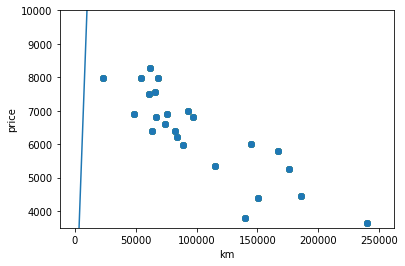

In [853]:
gd.fit(X, y)

In [854]:
gd.theta

array([[inf, inf]])

In [855]:
y_pred = gd.predict(X)

In [856]:
y_pred

array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf])

In [857]:
np.array(y).reshape(1, -1)

array([[3650, 3800, 4400, 4450, 5250, 5350, 5800, 5990, 5999, 6200, 6390,
        6390, 6600, 6800, 6800, 6900, 6900, 6990, 7490, 7555, 7990, 7990,
        7990, 8290]])

In [858]:
gd.theta

array([[inf, inf]])

In [859]:
gd.mse

{0: 11749501157.166666,
 1: 7.778479232008855e+28,
 2: 5.156300588404186e+47,
 3: 3.418076331497891e+66,
 4: 2.265819381092734e+85,
 5: 1.5019961433938013e+104,
 6: 9.956629524820535e+122,
 7: 6.600181493843976e+141,
 8: 4.375215090918609e+160,
 9: 2.9003001068464913e+179,
 10: 1.9225890693313688e+198,
 11: 1.2744711213804416e+217,
 12: 8.448381742842234e+235,
 13: 5.600374372977565e+254,
 14: 3.712449800706119e+273,
 15: 2.4609575369218096e+292,
 16: inf,
 17: inf,
 18: inf,
 19: inf,
 20: inf,
 21: inf,
 22: inf,
 23: inf,
 24: inf,
 25: inf,
 26: inf,
 27: inf,
 28: inf,
 29: inf,
 30: inf,
 31: inf,
 32: inf,
 33: inf,
 34: inf,
 35: inf,
 36: inf,
 37: inf,
 38: inf,
 39: inf,
 40: inf,
 41: inf,
 42: inf,
 43: inf,
 44: inf,
 45: inf,
 46: inf,
 47: inf,
 48: inf,
 49: inf,
 50: inf}

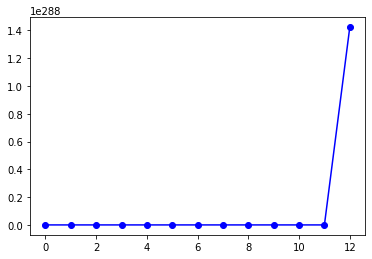

In [774]:
plt.plot(gd.mse.keys(), gd.mse.values(), marker='o', color='blue')

In [572]:
gd.mean_squared_error(y, y_pred)

75782487.56702627

In [573]:
gd.mae(y, y_pred)

6062.527649026865

In [634]:
from sklearn.linear_model import SGDRegressor

In [642]:
X = np.array(X).reshape(-1,1)

In [643]:
lr = SGDRegressor(max_iter=1000000000)
lr.fit(X, y)

SGDRegressor(max_iter=1000000000)

In [644]:
y_pred = lr.predict(X)

In [645]:
y_pred

array([-2.01450540e+19, -1.17344940e+19, -1.26326276e+19, -1.55729661e+19,
       -1.47730396e+19, -9.63605084e+18, -1.40008126e+19, -7.47045753e+18,
       -1.21290013e+19, -7.05076890e+18, -6.88532764e+18, -5.29311293e+18,
       -6.21139165e+18, -8.18392819e+18, -5.62382757e+18, -6.38136554e+18,
       -4.04873616e+18, -7.80620843e+18, -5.11592039e+18, -5.51252615e+18,
       -4.53263714e+18, -5.74973416e+18, -1.92208995e+18, -5.18642808e+18])

In [646]:
y

0     3650
1     3800
2     4400
3     4450
4     5250
5     5350
6     5800
7     5990
8     5999
9     6200
10    6390
11    6390
12    6600
13    6800
14    6800
15    6900
16    6900
17    6990
18    7490
19    7555
20    7990
21    7990
22    7990
23    8290
Name: price, dtype: int64

In [647]:
lr.score(X, y)

-5.434621224127624e+31

Text(0, 0.5, 'price')

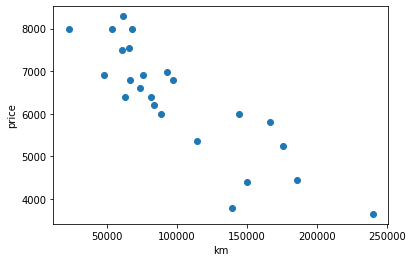

In [800]:
# plt.plot(gd.theta[0][1] * range(25000) + gd.theta[0][0])
plt.scatter(df.km, df.price)
plt.xlabel('km')
plt.ylabel('price')

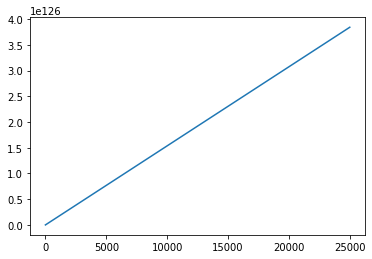

In [752]:
plt.plot(gd.theta[0][1] * range(25000) + gd.theta[0][0])

In [650]:
print("y = ", gd.theta[0][1], "* x +", gd.theta[0][0])

y =  12.48850277491978 * x + 1.0000898394500437
